# Introduction to Probability Distributions in Python

In this notebook, we will explore the concept of probability distributions using Python. Probability distributions are a fundamental concept in statistics that describe how the values of a random variable are distributed. Understanding these distributions is crucial for making informed decisions based on data.

We'll cover:

1. **What are Probability Distributions?**  
   We'll define probability distributions and explain their significance in statistical analysis.


3. **Visualizing Distributions:**  
   We will use Python libraries such as Matplotlib and Seaborn to visualize various probability distributions, helping to better understand their shapes and characteristics.

By the end of this notebook, you will have a solid understanding of probability distributions and how to work with them in Python, enabling you to analyze and interpret data more effectively.


# Importing Necessary Libraries

In this section, we import the essential libraries for our analysis:

- **Pandas:** For data manipulation and analysis.
- **NumPy:** For numerical operations and handling arrays.
- **Matplotlib:** For creating static visualizations.
- **Seaborn:** For enhanced statistical graphics and data visualization.
- **SciPy Stats:** For statistical functions and probability distributions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Simulating Dice Rolls

In this code snippet, we create a DataFrame to represent a die with values from 1 to 6. We then simulate rolling 2 dice with replacement and calculate the sum of the rolls. Finally, we print the result of the summed rolls.


In [3]:
import pandas as pd

# Create a DataFrame representing a die with values 1 to 6
die = pd.DataFrame([1, 2, 3, 4, 5, 6])

# Sample 2 dice rolls with replacement (can pick the same number twice)
sum_of_dice = die.sample(2, replace=True).sum().loc[0]

# Print the result of the sum of the dice rolls
print('Sum of dice is', sum_of_dice)


Sum of dice is 9


# Simulating Multiple Trials of Dice Rolls

In this section, we perform 50 trials of rolling 2 dice with replacement. We store the sum of each trial in a list called `result`. The first 10 results of these trials are displayed for review.


In [4]:
trial = 50

result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
result[:10]

[8, 7, 10, 4, 7, 4, 8, 8, 10, 9]

# Performing Multiple Trials of Dice Rolls

In this section, we define a variable `trial` to represent the number of simulations we want to perform, which is set to 50. We then create a list called `result` that stores the sum of two dice rolls for each of these trials. The dice rolls are sampled with replacement, meaning the same number can appear multiple times. Finally, we display the first 10 results from our list of trials to see the outcomes of our dice rolls.


In [5]:
trial = 50  # Define the number of trials (simulations) to perform

# Create a list of results by sampling two dice rolls (with replacement) for each trial
# The sample is done 50 times, and the sum of the two dice is calculated for each trial
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

# Display the first 10 results of the dice rolls
result[:10]


[11, 10, 11, 3, 6, 8, 12, 5, 12, 7]

# Analyzing Frequency of Dice Roll Sums

In this section, we create a DataFrame called `freq` from the `result` list, which contains the sums of the dice rolls from our trials. We then use the `value_counts()` method to count how often each sum occurs. Next, we sort these frequency counts by their corresponding sums (ranging from 2 to 12) to ensure they are presented in numerical order. Finally, we display the sorted frequency counts to analyze the distribution of sums obtained from our dice rolls.


In [6]:
# Create a DataFrame from the 'result' list (containing sums of dice rolls)
# and extract the first column (column index 0) to work with the values
freq = pd.DataFrame(result)[0].value_counts()

# Sort the frequency counts by the index (the possible sums of dice rolls, which range from 2 to 12)
# This ensures the frequencies are listed in the correct numerical order of the sums
sort_freq = freq.sort_index()

# Display the sorted frequency counts
sort_freq


0
3      5
4      1
5      5
6      6
7     10
8      6
9      5
10     4
11     5
12     3
Name: count, dtype: int64

# Visualizing the Frequency of Dice Roll Sums

Here, we plot the sorted frequency counts of the dice roll sums using a bar chart. The `kind='bar'` parameter specifies that we want a bar chart, while the `color='blue'` parameter sets the color of the bars to blue. This visualization allows us to easily see how frequently each sum occurred in our trials, helping us to understand the distribution of outcomes from rolling the dice.


<Axes: xlabel='0'>

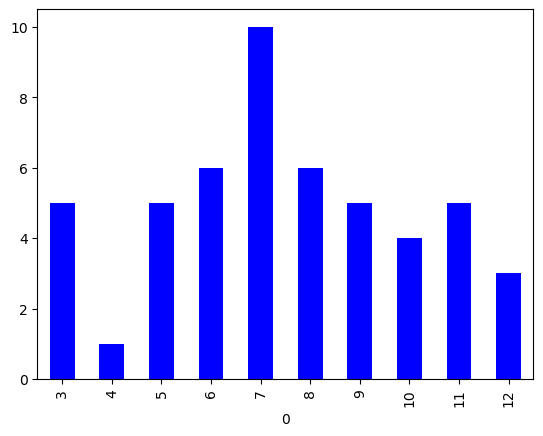

In [7]:
sort_freq.plot(kind='bar', color='blue')

# Theoretical Probability Distribution of Dice Rolls

In this section, we assume that the dice are fair, meaning each face has an equal chance of appearing. This allows us to define the theoretical distribution of the random variable, which is the sum of two dice rolls. 

We create a DataFrame to represent the possible sums of rolling two dice, which can range from 2 to 12. We then assign probabilities to each possible sum based on how many ways each sum can occur. For example, the sum of 7 has the highest probability because it can be obtained through more combinations of the dice. 

The probabilities are calculated by dividing the count of occurrences by 36, the total number of possible outcomes when rolling two dice (6 faces each). The resulting DataFrame shows the theoretical probability distribution for each sum.


In [16]:
# We assume that we have fair dice, meaning all faces (1 to 6) have an equal chance of appearing.
# This allows us to know the theoretical 'distribution' of the random variable, which in this case is the sum of two dice.

# Create a DataFrame to represent the possible sums of rolling two dice (2 to 12).
X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Assign probabilities to each possible sum based on how many ways each sum can occur.
# For example, a sum of 7 has the highest probability because there are more combinations of dice that add up to 7.
# 2 can only occur 1 events, 3 can occur in 2 events, 4 can occur in 3 events, 5 can occur in 4 events etc
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

# Convert these counts to probabilities by dividing each by 36 (since there are 6 * 6 = 36 possible outcomes when rolling two dice).
X_distri['Prob'] = X_distri['Prob'] / 36

# Display the resulting probability distribution, where each sum (from 2 to 12) is assigned a probability.
X_distri


,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


# Calculating the Mean and Variance of the Probability Distribution

In this step, we calculate the mean and variance of the theoretical probability distribution we created earlier. 

- **Mean:** The mean is computed by multiplying each possible sum (the index of our DataFrame) by its corresponding probability, and then summing these values. This gives us the expected value of the sums when rolling two dice.

- **Variance:** The variance measures how spread out the possible sums are around the mean. It's calculated by taking the squared difference between each sum and the mean, multiplying by the corresponding probability, and summing these values.

Finally, we print the mean and variance to understand the expected outcome and the variability of the sums from rolling the dice.


In [18]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
print(mean, var)

6.999999999999998 5.833333333333333


# Your Turn: Create Your Own Probability Distribution

Now it's your turn to practice what you've learned! Follow the steps below to create a probability distribution for a different scenario, such as rolling three dice.

### Instructions:
1. **Create a DataFrame** for the possible sums of rolling three dice (the sums will range from 3 to 18).
2. **Determine the probabilities** for each possible sum based on how many ways each sum can occur. 
3. **Calculate the mean and variance** for this new probability distribution just like we did for the two dice.
4. **Print the mean and variance** to observe the expected outcome and variability.

### Tips:
- Remember that when rolling three dice, there are a total of 6 * 6 * 6 = 216 possible outcomes.
- Consider how many combinations can result in each sum, similar to the earlier example.

Happy coding!
